<a href="https://colab.research.google.com/github/bachinaram/DataAnalytics1/blob/main/DA1_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Data Cleaning ***

1. Dropping columns with unwanted data for analytics
2. Data conversion from object to numerical by stripping extra characters and later convert to numerical data
3. For missing data in numerical columns - mean of all rows is calculated and adding the mean in the missing rows for that feature 
4.  Features are also dropped if the data is missing over more than 30% 






In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df1 = pd.read_csv("/content/sample_data/football_data.csv")
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 600)
pd.set_option('display.width', 999)

#dropping unwanted columns
df1.drop(columns='Release Clause')
df1.drop(['ID', 'Name', 'Photo', 'Flag', 'Club Logo', 'Loaned From'], axis=1, inplace=True)
#once we delete and we try to run it again we get error

#checking to see if it really deleted
# Converting  the columns to string for striping the unwanted data.
df1_int_list = ['LS',	'ST',	'RS',	'LW',	'LF',	'CF',	'RF',	'RW',	'LAM',	'CAM',	'RAM',	'LM',	'LCM',	'CM',	'RCM',	'RM',	'LWB',	'LDM',	'CDM',	'RDM',	'RWB',	'LB',	'LCB',	'CB',	'RCB',	'RB']
for i in df1_int_list :
  # Converting the column data to string
  df1[i] = df1[i].astype(str)
  #Imputation on numeric values
  df1[i].fillna("0", inplace = True)
  #Striping the data that is present after "+"
  df1[i] = df1[i].map(lambda x: x.split("+", 1)[0].rstrip())
#Finding the NULL values present in each column
#display null values in given features
#df1.isnull().sum()


In [47]:
# Imputing the Numeric values
# football_df['Goal_Keeper'].fillna(football_df['Goal_Keeper'].mean(), inplace = True)
#As a part of data cleaning process missing values for some of the features is added after describing the data frame
#It is important to keep mean for data columns like Volleys, lonpassing, Head accuracy, ball control dribbling, curve, short passing,
#finishing and crossing
df1['Wage'].fillna('€200K', inplace = True)
df1['Preferred Foot'].fillna('Right', inplace = True)
df1['Volleys'].fillna(df1['Volleys'].mean(), inplace = True)
df1['Joined'].fillna('Jul 1, 2018', inplace = True)
df1['LongPassing'].fillna(df1['LongPassing'].mean(), inplace = True)
df1['Weight'].fillna('200lbs', inplace = True)
df1['Contract Valid Until'].fillna(2019, inplace = True)
df1['HeadingAccuracy'].fillna(df1['HeadingAccuracy'].mean(), inplace = True)
df1['Height'].fillna("5'11", inplace = True)
df1['BallControl'].fillna(df1['BallControl'].mean(), inplace = True)
df1['FKAccuracy'].fillna(df1['FKAccuracy'], inplace = True)
df1['Jersey Number'].fillna(8, inplace = True)
df1['Body Type'].fillna('Normal', inplace = True)
df1['Dribbling'].fillna(df1['Dribbling'].mean(), inplace = True)
df1['Position'].fillna('ST', inplace = True)
df1['Curve'].fillna(df1['Curve'].mean(), inplace = True)
df1['Club'].fillna('No Club', inplace = True)
df1['ShortPassing'].fillna(df1['ShortPassing'].mean(), inplace = True)
df1['Work Rate'].fillna('Medium/ Medium', inplace = True)
df1['Skill Moves'].fillna(df1['Skill Moves'].median(), inplace = True)
df1['Weak Foot'].fillna(3, inplace = True)
df1['Finishing'].fillna(df1['Finishing'].mean(), inplace = True)
df1['International Reputation'].fillna(1, inplace = True)
df1['Wage'].fillna('€200K', inplace = True)
df1['Crossing'].fillna(df1['Crossing'].mean(), inplace = True)


In [48]:
# Finding the Null values present in the datset.
#if data is missing more than 33% pecentage of given data then we need to remove the entire feature
size = len(df1)
percent_missing = df1.isnull().sum() * 100 / size
table_for_values_missing = pd.DataFrame({'features': df1.columns,'percent_missing': round(percent_missing, 2)})
#table_for_values_missing

features  percent_missing
Unnamed: 0                              Unnamed: 0             0.00
Age                                            Age             0.00
Nationality                            Nationality             0.00
Overall                                    Overall             0.00
Potential                                Potential             0.00
Club                                          Club             0.00
Value                                        Value             0.00
Wage                                          Wage             0.00
Special                                    Special             0.00
Preferred Foot                      Preferred Foot             0.00
International Reputation  International Reputation             0.00
Weak Foot                                Weak Foot             0.00
Skill Moves                            Skill Moves             0.00
Work Rate                                Work Rate             0.00
Body Type                                Body Type             0.00
Real Face                                Real Face             0.26
Position                                  Position             0.00
Jersey Number                        Jersey Number             0.00
Joined                                      Joined             0.00
Contract Valid Until          Contract Valid Until             0.00
Height                                      Height             0.00
Weight                                      Weight             0.00
LS                                              LS             0.00
ST                                              ST             0.00
RS                                              RS             0.00
LW                                              LW             0.00
LF                                              LF             0.00
CF                                              CF             0.00
RF                                              RF             0.00
RW                                              RW             0.00
LAM                                            LAM             0.00
CAM                                            CAM             0.00
RAM                                            RAM             0.00
LM                                              LM             0.00
LCM                                            LCM             0.00
CM                                              CM             0.00
RCM                                            RCM             0.00
RM                                              RM             0.00
LWB                                            LWB             0.00
LDM                                            LDM             0.00
CDM                                            CDM             0.00
RDM                                            RDM             0.00
RWB                                            RWB             0.00
LB                                              LB             0.00
LCB                                            LCB             0.00
CB                                              CB             0.00
RCB                                            RCB             0.00
RB                                              RB             0.00
Crossing                                  Crossing             0.00
Finishing                                Finishing             0.00
HeadingAccuracy                    HeadingAccuracy             0.00
ShortPassing                          ShortPassing             0.00
Volleys                                    Volleys             0.00
Dribbling                                Dribbling             0.00
Curve                                        Curve             0.00
FKAccuracy                              FKAccuracy             0.26
LongPassing                            LongPassing             0.00
BallControl                            BallControl             0.00
Acceleration                  

In [49]:
df1['LS'] = df1['LS'].map(lambda x: x.split("+", 1)[0].rstrip())
df1.shape

(18207, 83)

In [50]:
#df1.info()

In [51]:
# select the float columns
df_num = df1.select_dtypes(include=[np.float])
df_num = df1.select_dtypes(include=[np.int])
# select non-numeric columns
df_obj = df1.select_dtypes(include=[np.object])

print(df_num)

       Unnamed: 0  Age  Overall  Potential  Special
0               0   31       94         94     2202
1               1   33       94         94     2228
2               2   26       92         93     2143
3               3   27       91         93     1471
4               4   27       91         92     2281
...           ...  ...      ...        ...      ...
18202       18202   19       47         65     1307
18203       18203   19       47         63     1098
18204       18204   16       47         67     1189
18205       18205   17       47         66     1228
18206       18206   16       46         66     1321

[18207 rows x 5 columns]


In [52]:
#data inspection
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.unique().shape[0],axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(df_obj)

Data Type  No of Levels                                             Levels
Nationality             object           164  ['Argentina' 'Portugal' 'Brazil' 'Spain' 'Belg...
Club                    object           652  ['FC Barcelona' 'Juventus' 'Paris Saint-Germai...
Value                   object           217  ['€110.5M' '€77M' '€118.5M' '€72M' '€102M' '€9...
Wage                    object           144  ['€565K' '€405K' '€290K' '€260K' '€355K' '€340...
Preferred Foot          object             2                                   ['Left' 'Right']
Work Rate               object             9  ['Medium/ Medium' 'High/ Low' 'High/ Medium' '...
Body Type               object            10  ['Messi' 'C. Ronaldo' 'Neymar' 'Lean' 'Normal'...
Real Face               object             3                                   ['Yes' 'No' nan]
Position                object            27  ['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LC...
Joined                  object          1736  ['Jul 1, 2004' 'Jul 10, 2018' 'Aug 3, 2017' .....
Contract Valid Until    object            37  ['2021' '2022' '2020' '2023' '2019' '2024' 'Ju...
Height                  object            21  ["5'7" "6'2" "5'9" "6'4" "5'11" "5'8" "6'0" "5...
Weight                  object            58  ['159lbs' '183lbs' '150lbs' '168lbs' '154lbs' ...
LS                      object            60  ['88' '91' '84' 'nan' '82' '83' '77' '87' '73'...
ST                      object            60  ['88' '91' '84' 'nan' '82' '83' '77' '87' '73'...
RS                      object            60  ['88' '91' '84' 'nan' '82' '83' '77' '87' '73'...
LW                      object            65  ['92' '89' 'nan' '87' '85' '86' '70' '83' '81'...
LF                      object            65  ['93' '90' '89' 'nan' '87' '88' '84' '71' '86'...
CF                      object            65  ['93' '90' '89' 'nan' '87' '88' '84' '71' '86'...
RF                      object            65  ['93' '90' '89' 'nan' '87' '88' '84' '71' '86'...
RW                      object            65  ['92' '89' 'nan' '87' '85' '86' '70' '83' '81'...
LAM                     object            65  ['93' '88' '89' 'nan' '87' '85' '71' '83' '84'...
CAM                     object            65  ['93' '88' '89' 'nan' '87' '85' '71' '83' '84'...
RAM                     object            65  ['93' '88' '89' 'nan' '87' '85' '71' '83' '84'...
LM                      object            64  ['91' '88' 'nan' '89' '86' '84' '72' '81' '82'...
LCM                     object            60  ['84' '81' 'nan' '87' '82' '88' '79' '75' '77'...
CM                      object            60  ['84' '81' 'nan' '87' '82' '88' '79' '75' '77'...
RCM                     object            60  ['84' '81' 'nan' '87' '82' '88' '79' '75' '77'...
RM                      object            64  ['91' '88' 'nan' '89' '86' '84' '72' '81' '82'...
LWB                     object            57  ['64' '65' 'nan' '77' '66' '82' '69' '81' '61'...
LDM                     object            61  ['61' '60' 'nan' '77' '63' '81' '68' '84' '62'...
CDM                     object            61  ['61' '60' 'nan' '77' '63' '81' '68' '84' '62'...
RDM                     object            61  ['61' '60' 'nan' '77' '63' '81' '68' '84' '62'...
RWB                     object            57  ['64' '65' 'nan' '77' '66' '82' '69' '81' '61'...
LB                      object            57  ['59' '61' '60' 'nan' '73' '79' '66' '84' '58'...
LCB                     object            63  ['47' '53' 'nan' '66' '49' '71' '63' '87' '57'...
CB                      object            63  ['47' '53' 'nan' '66' '49' '71' '63' '87' '57'...
RCB                     object            63  ['47' '53' 'nan' '66' '49' '71' '63' '87' '57'...
RB                      object            57  ['59' '61' '60' 'nan' '73' '79' '66' '84' '58'...
Release Clause          object          1245  ['€226.5M' '€127.1M' '€228.1M' ... '€74K' '€10...

In [53]:
clud_df_columns = df1['Club'].unique()
club_df_counts = df1['Club'].value_counts()


In [54]:
# Converting the price value to float



def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

In [55]:
#below statements are one time action for imputation
df1['Wage'] = df1['Wage'].apply(lambda x: extract_value_from(x))
df1['Value'] = df1['Value'].apply(lambda x: extract_value_from(x))
df1.replace({"Weight": {"lbs" : ""}}, regex=True, inplace=True)




In [56]:
main_columns=['Crossing', 'Finishing',	'HeadingAccuracy',	'ShortPassing',	'Volleys',	'Dribbling',	'Curve',  
              'FKAccuracy',	'LongPassing',	'BallControl',	'Acceleration',	'SprintSpeed',	'Agility',	'Reactions',
              'Balance',	'ShotPower',	'Jumping',	'Stamina',	'Strength',	'LongShots',	'Aggression',	'Interceptions',
              'Positioning',	'Vision',	'Penalties',	'Composure',	'Marking',	'StandingTackle',	'SlidingTackle']
groups = df1.groupby(df1['Position'])[main_columns].mean().iterrows()



#Question1 - part1
"get current axes". "Current" here means that it provides a handle to the last active axes. If there is no axes yet, an axes will be created.

1. count of players based on height
2. skill moves feature to show no of players have the skill moves
3. We can also consider the feature like Preferred foot (right or left)

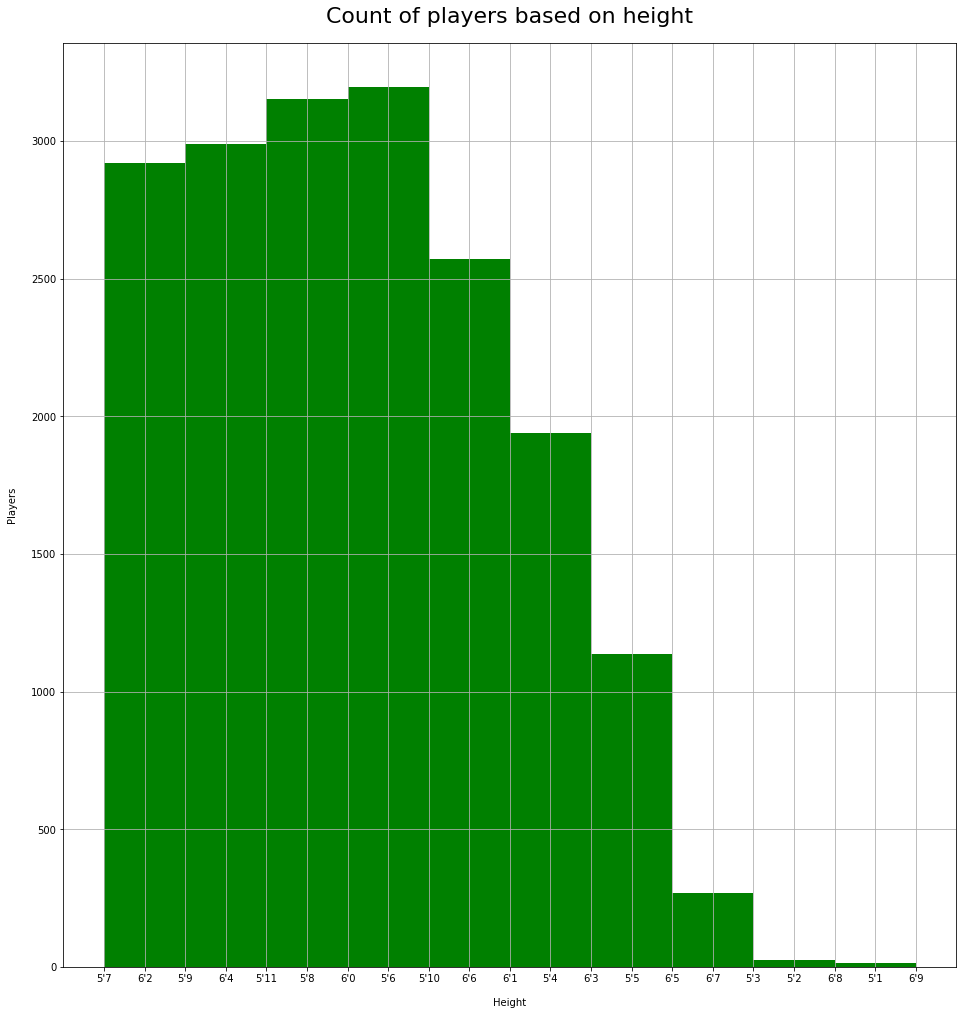

In [57]:

dimension = plt.figure(figsize = (16,17))
current_gca = dimension.gca()
plt.xlabel("Height", labelpad=14)
plt.ylabel("Players", labelpad=14)
plt.title("Count of players based on height", y=1.015, fontsize=22);
df1['Height'].hist(color='green',ax=current_gca)

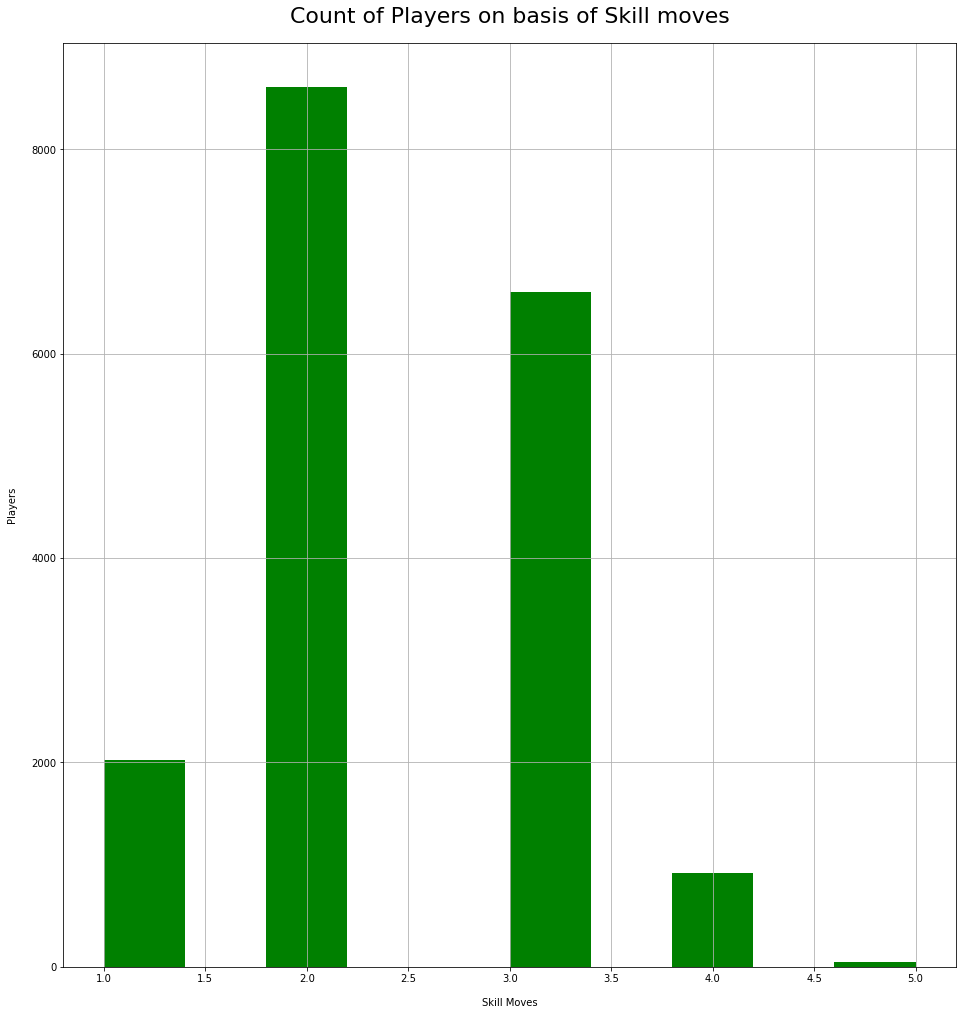

In [58]:
dimension = plt.figure(figsize = (16,17))
current_gca = dimension.gca()
plt.xlabel("Skill Moves", labelpad=14)
plt.ylabel("Players", labelpad=14)
plt.title("Count of Players on basis of Skill moves", y=1.015, fontsize=22);
df1['Skill Moves'].hist(color='green',ax=current_gca)

#Question1 - part2
Distribution of players in different clubs/country on the basis of some attribute.

1. Age of players based on the Nationality - Scatterplot
2. potential of players based on the Club - Scatterplot
3. Counting the No of players belongs to club on basis of ranking (unique with hue of Overall ranking)


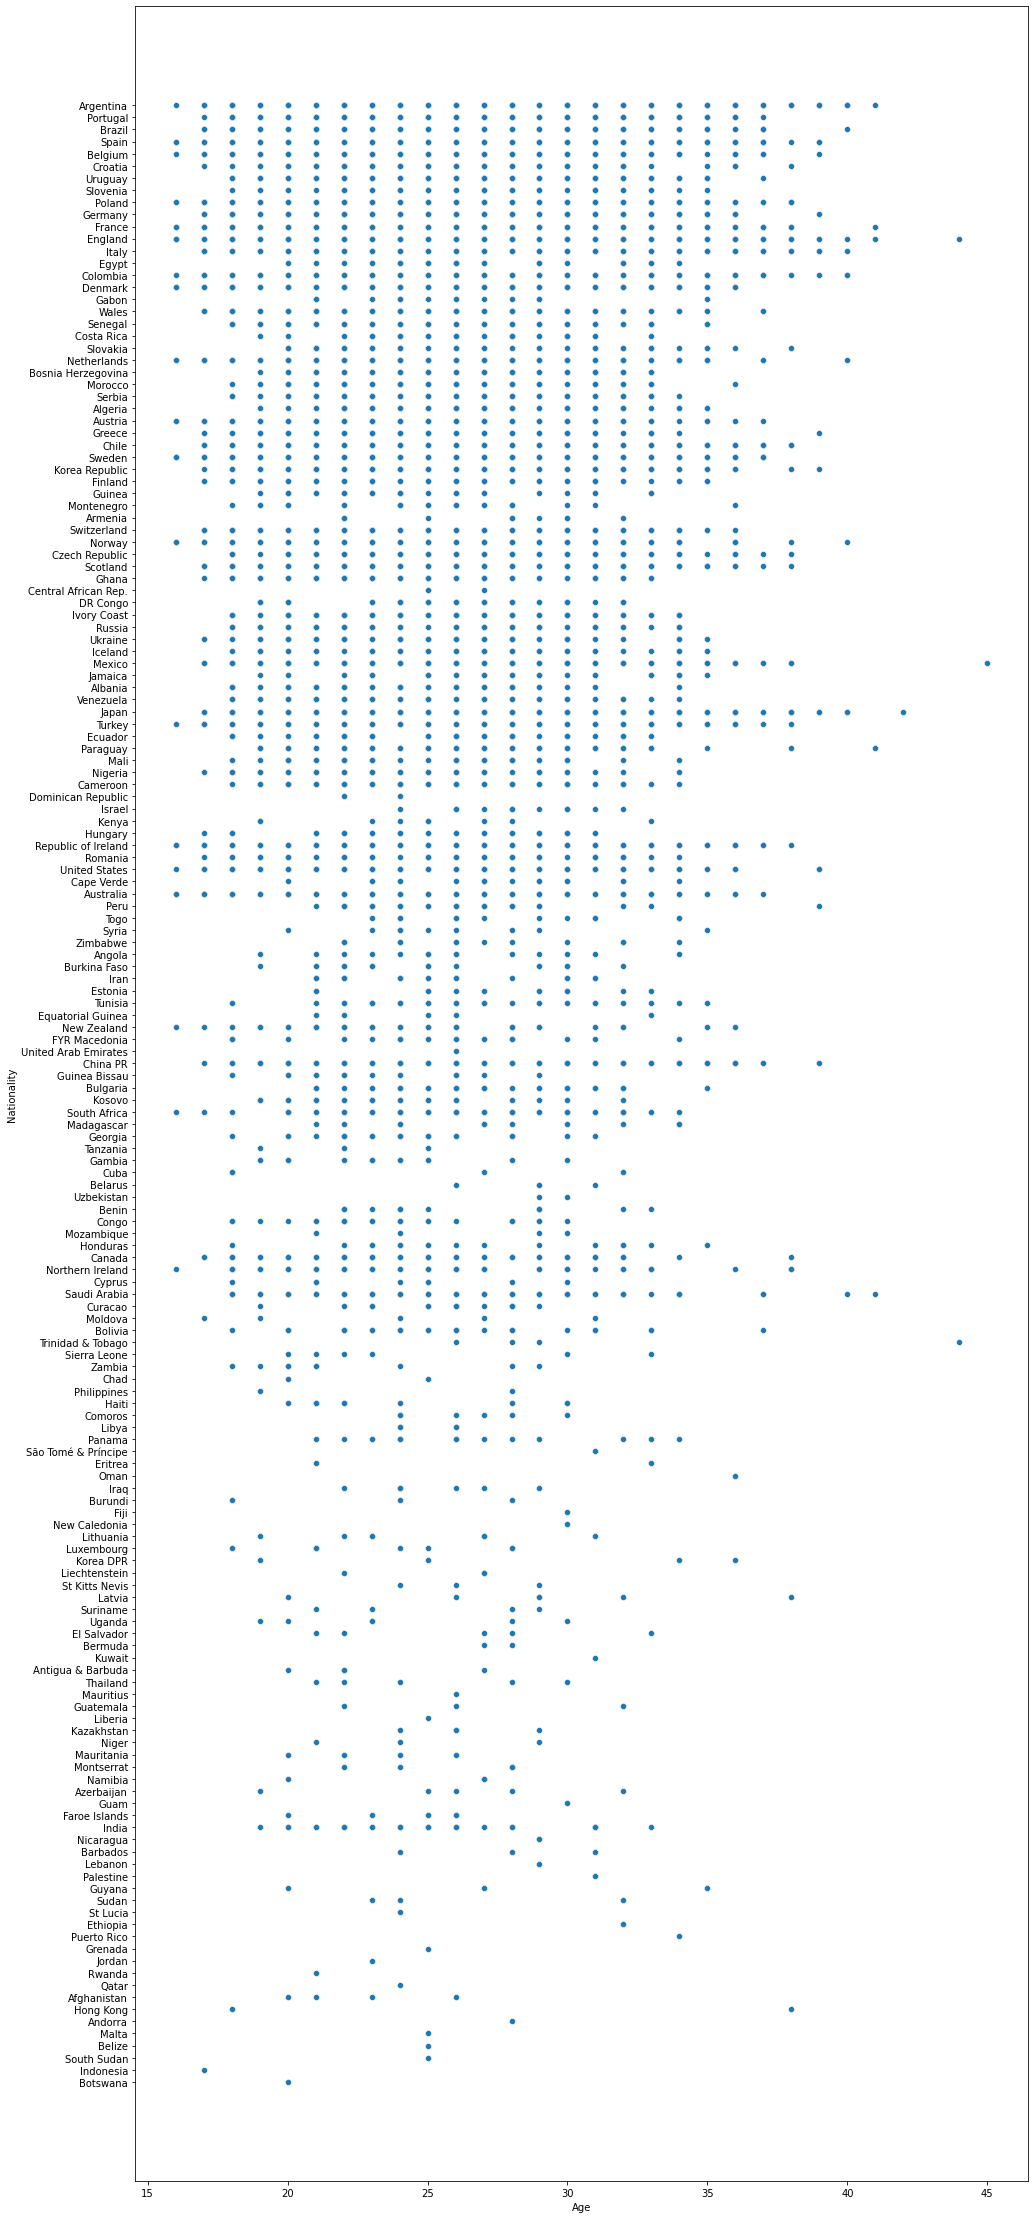

In [59]:
dimension = plt.figure(figsize = (16,40))
sns.scatterplot(x ='Age', y ='Nationality', data = df1)

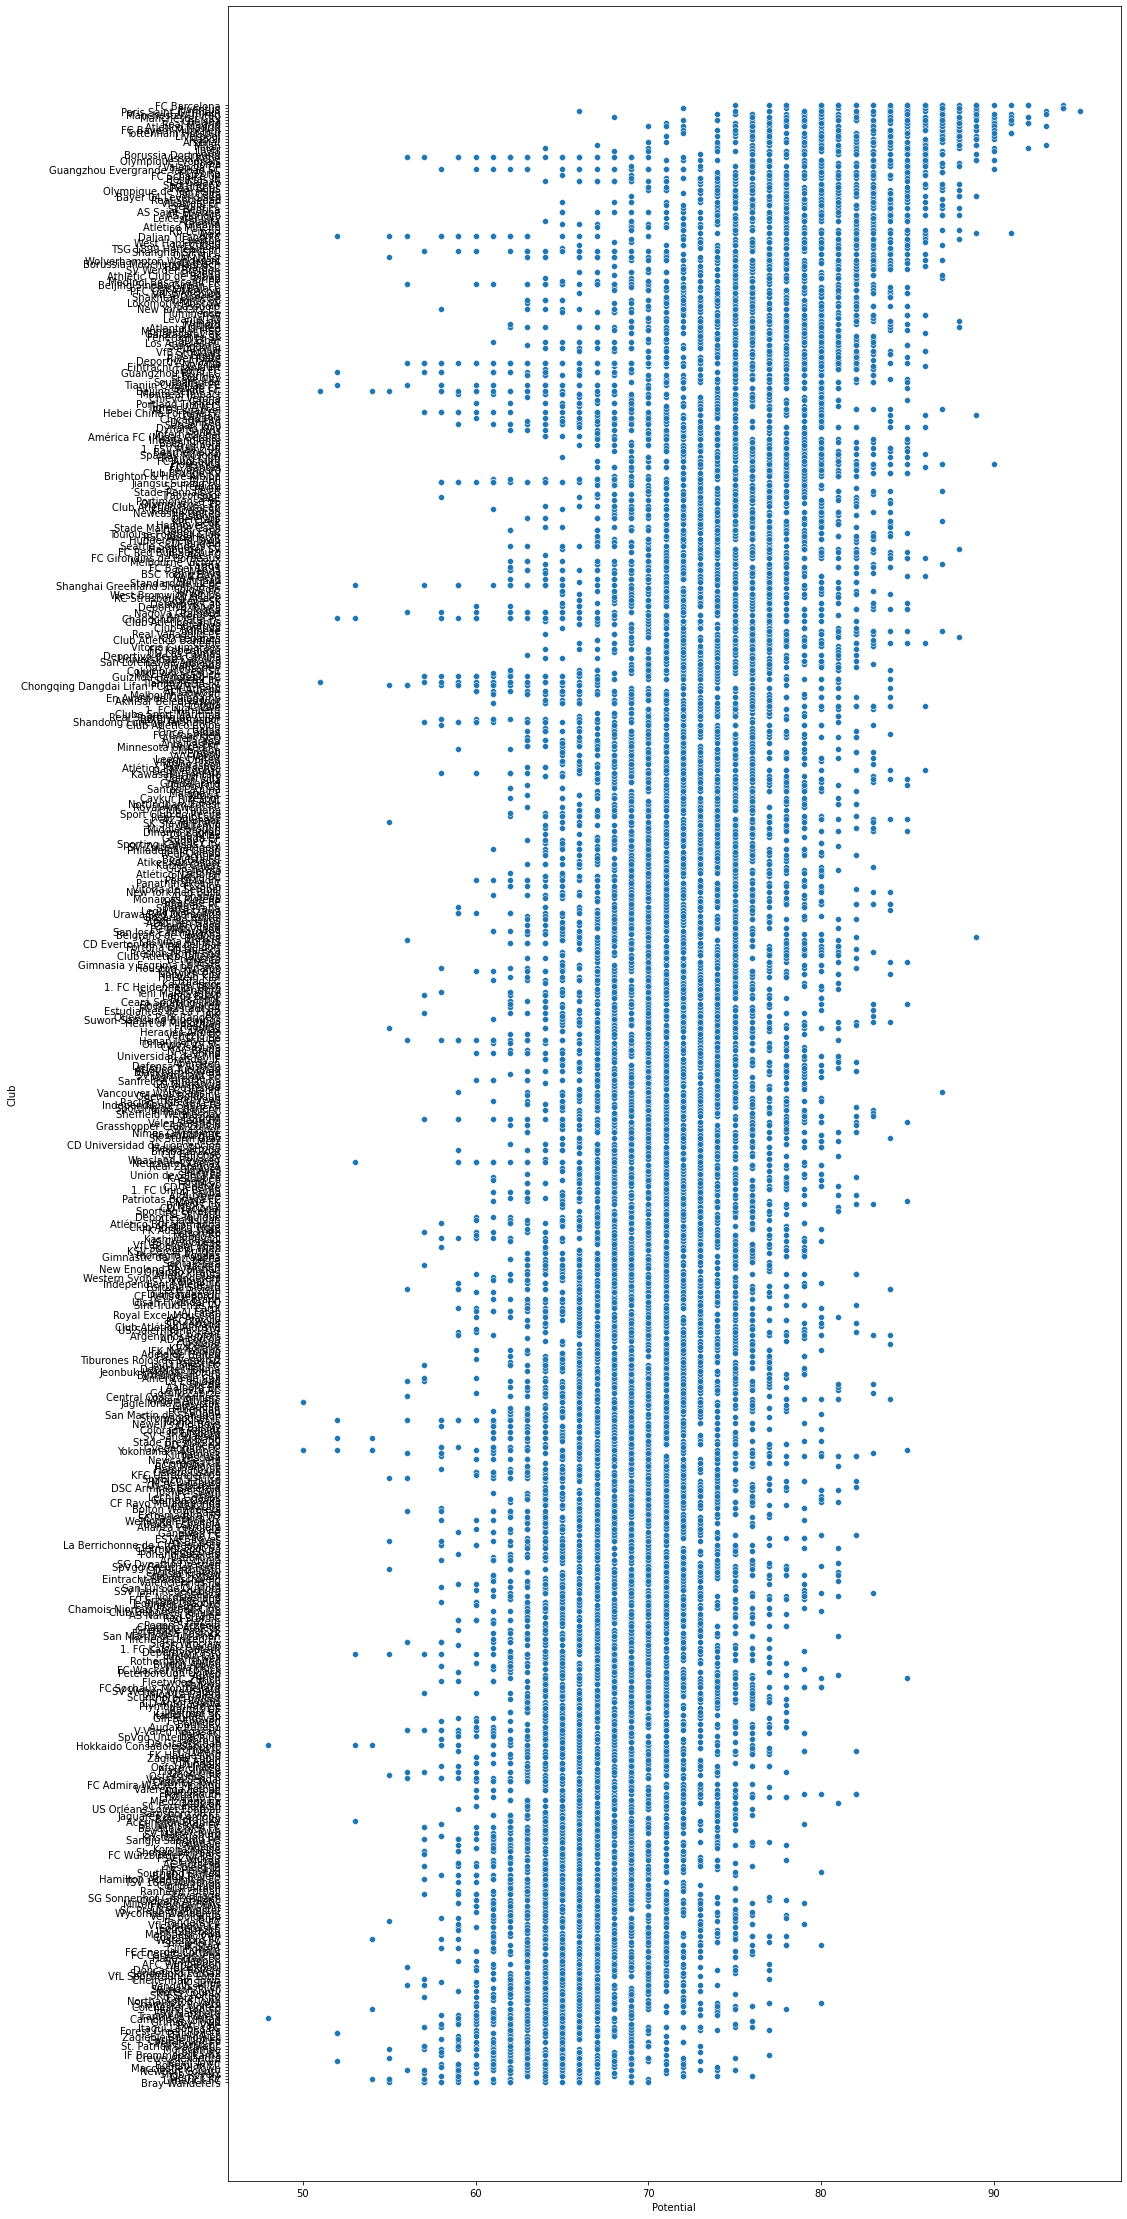

In [60]:
dimension = plt.figure(figsize = (16,40))
sns.scatterplot(x ='Potential', y ='Club', data = df1)

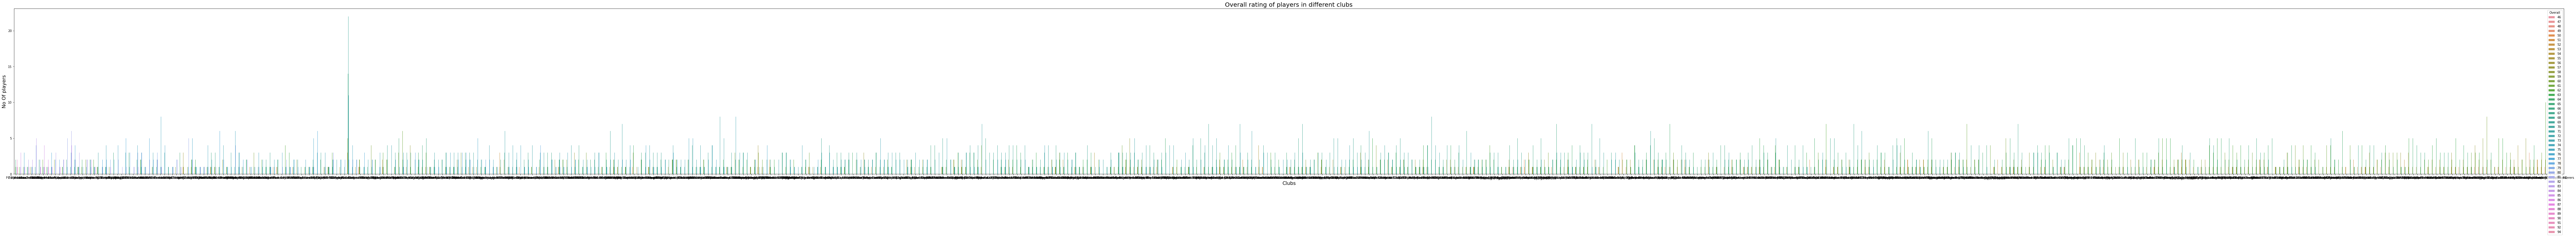

In [61]:
#runs for nearly 2 mins 
plt.figure(figsize = (150, 10))
ax1 = sns.countplot(x = 'Club',hue='Overall',data = df1)
ax1.set_title(label = f'Overall rating of players in different clubs', fontsize = 20)
ax1.set_xlabel(xlabel = f'Clubs', fontsize = 16)
ax1.set_ylabel(ylabel = 'No Of players', fontsize = 16)
plt.show()

In [62]:
#converting to inches for numerical data
a=[]
for i in df1['Height']:
  convert_feet = i.split("'")[0]
  convert_inch = i.split("'")[1].split("\"")[0]
  total_inches = int(convert_feet) * 12 + int(convert_inch)
  a.append(total_inches)
df1['Height']=a;

In [63]:
#a = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM',	'RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
objtofloat = ['Height','Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM',	'RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']

df1.head()
##I have to work on it
for a in objtofloat:
   df1[a] = df1[a].astype(float, errors = 'raise')



In [64]:
df2 = df1
correlated_features = set()
correlation_matrix = df2.corr()


for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
correlated_features


len(correlated_features)

{'BallControl',
 'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'Dribbling',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'Interceptions',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LW',
 'Marking',
 'Overall',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST',
 'ShortPassing',
 'SlidingTackle',
 'SprintSpeed',
 'StandingTackle'}

37

#Question 1 - part 3

1. Top three features based on the positioning of a player
2. Features of players according to their positioning - correlated map

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


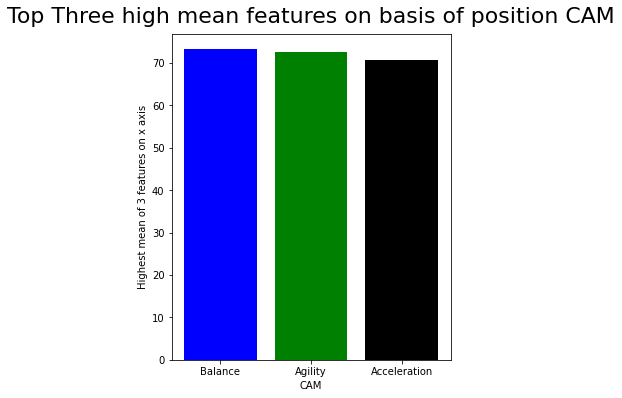

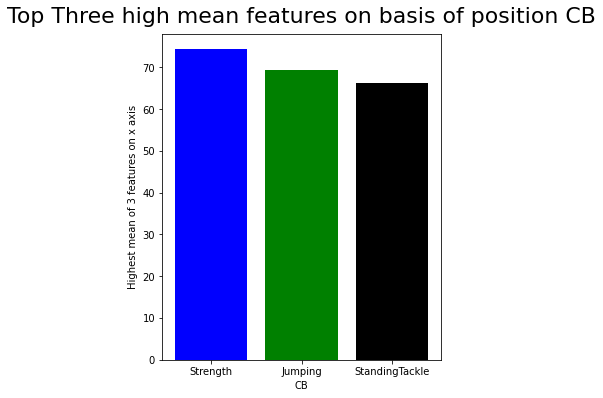

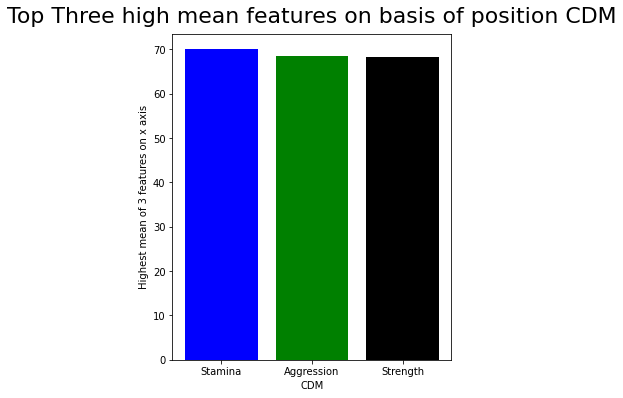

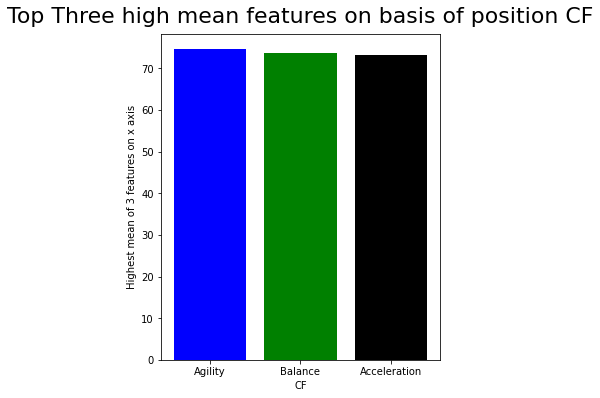

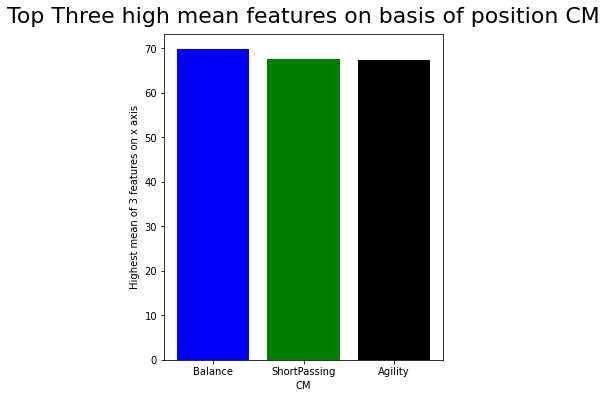

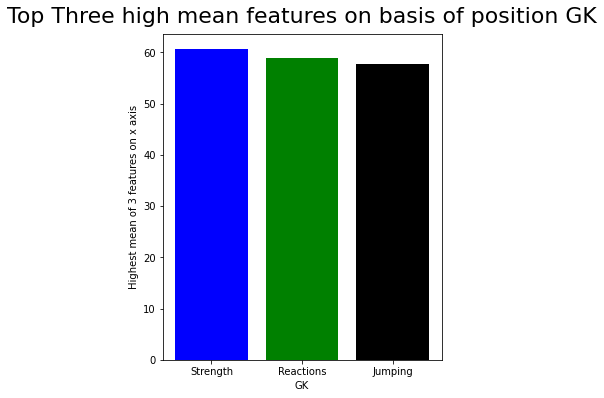

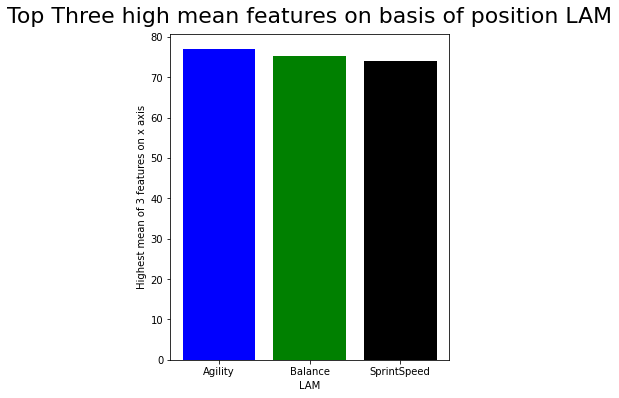

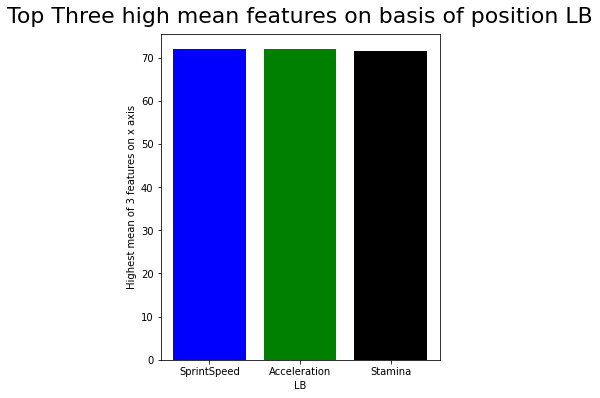

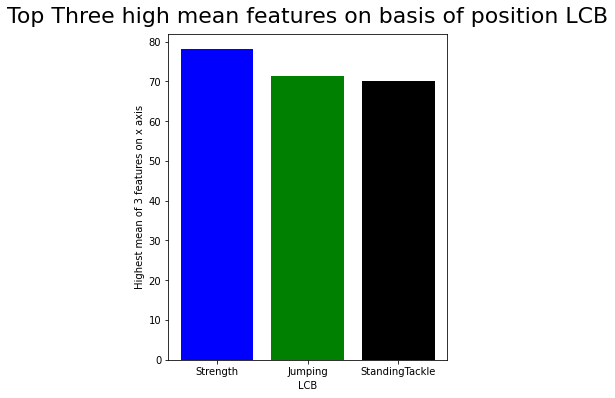

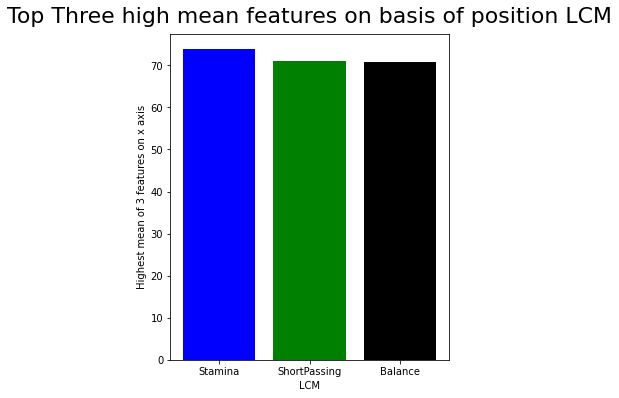

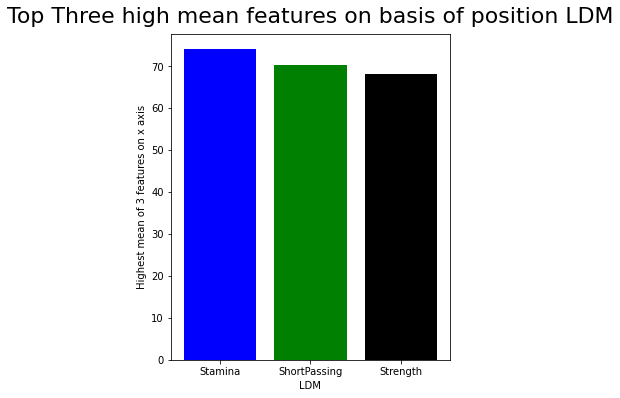

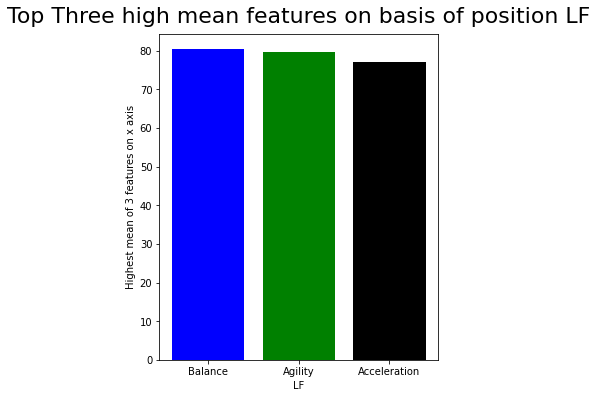

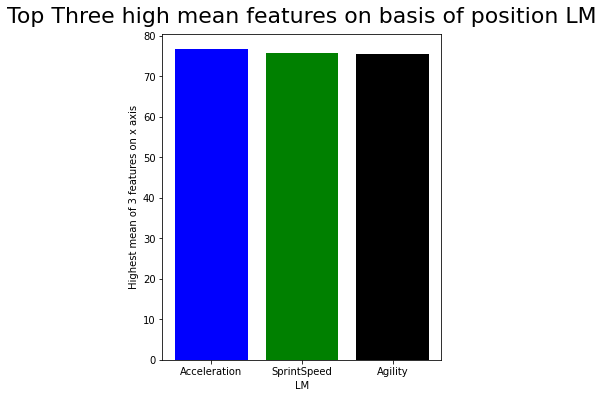

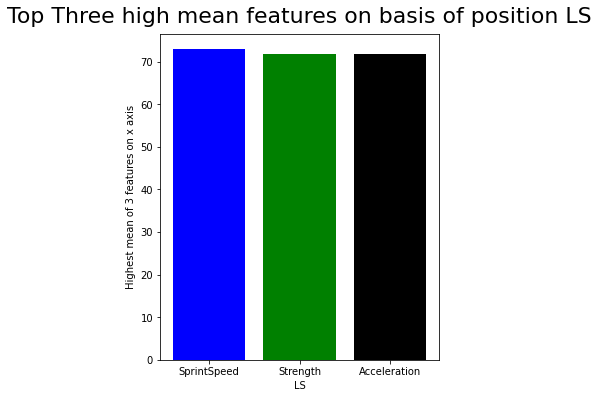

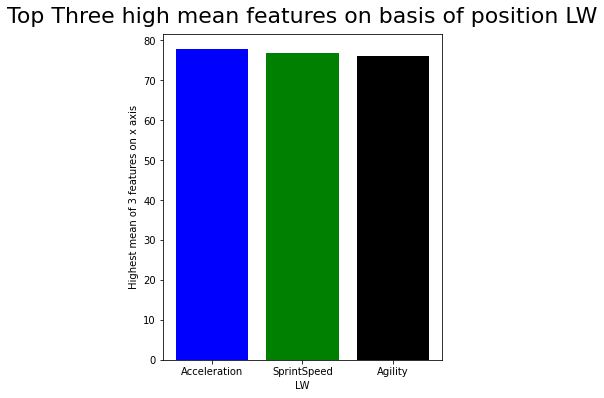

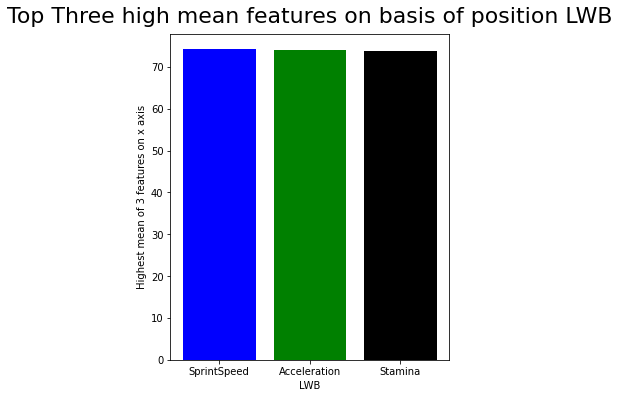

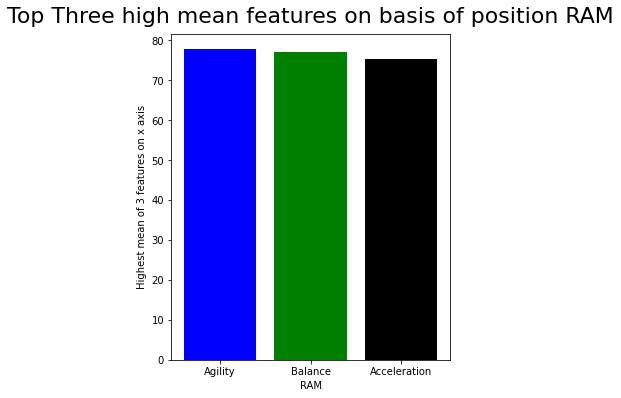

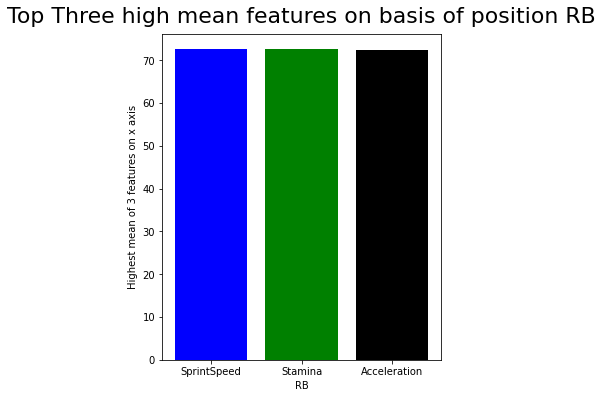

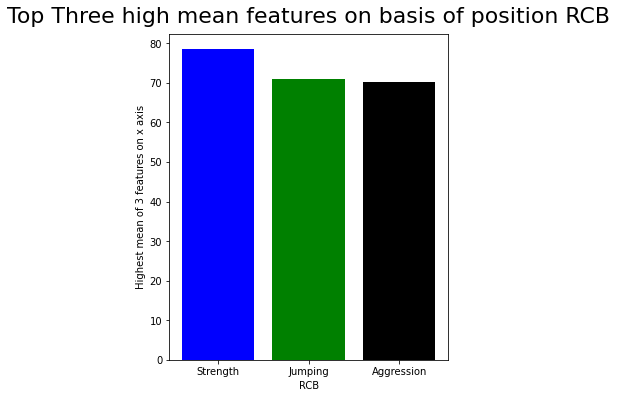

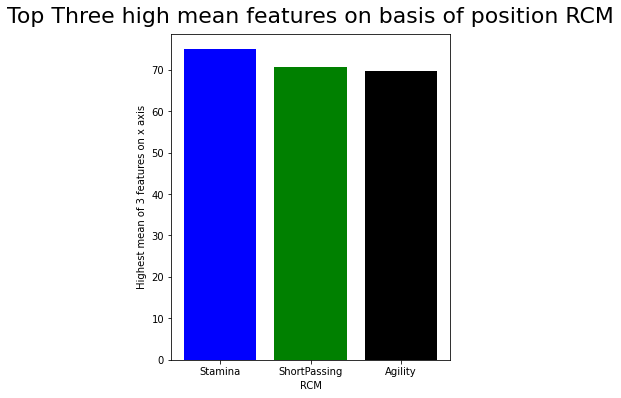

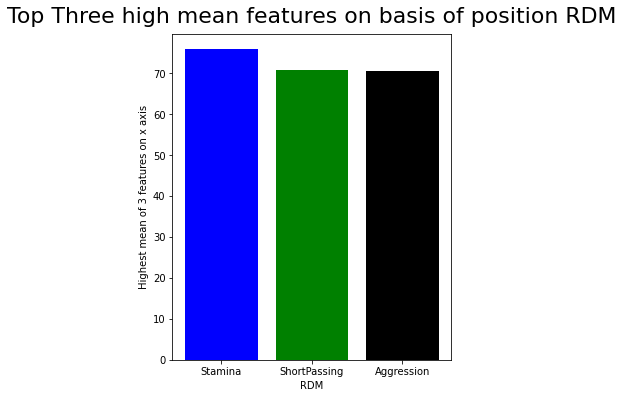

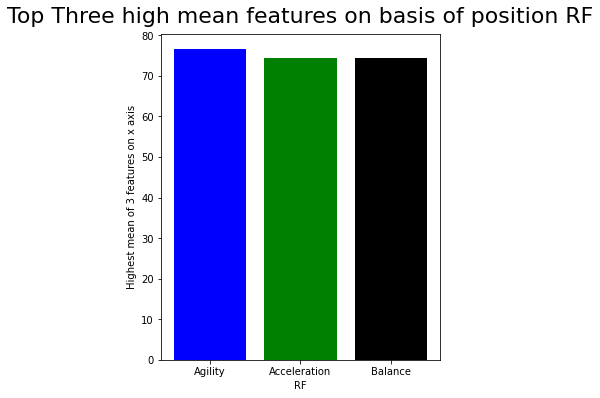

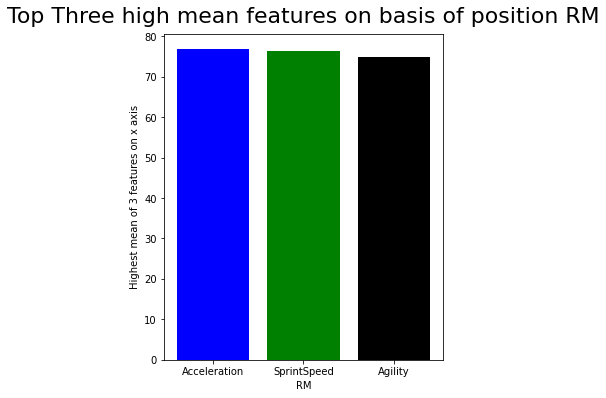

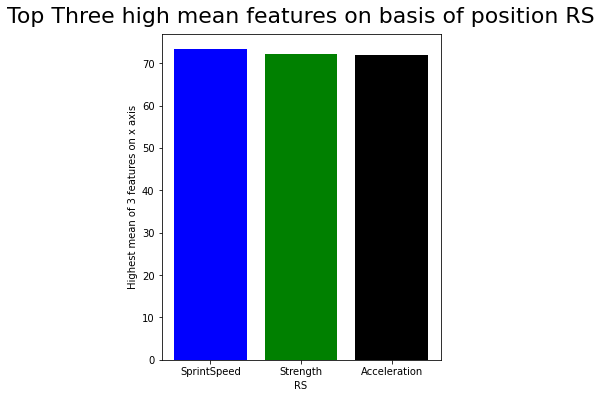

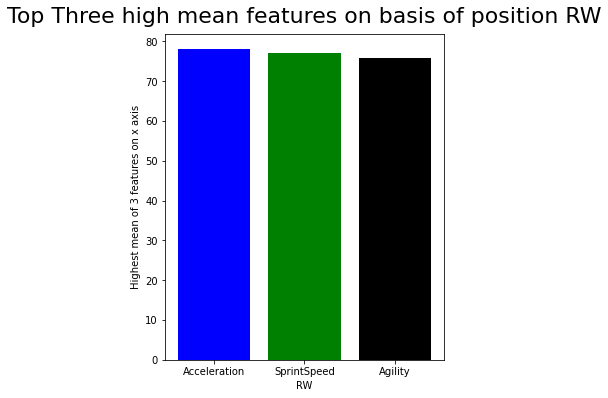

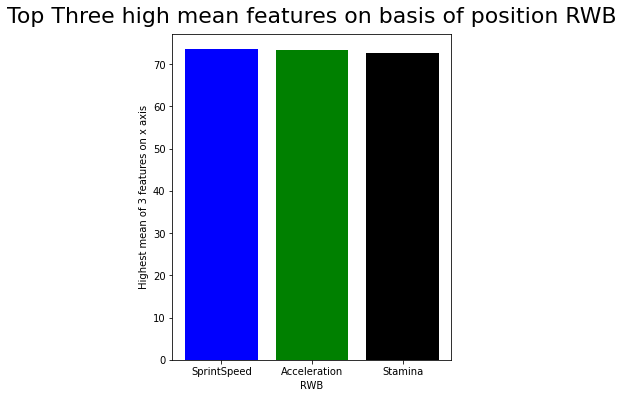

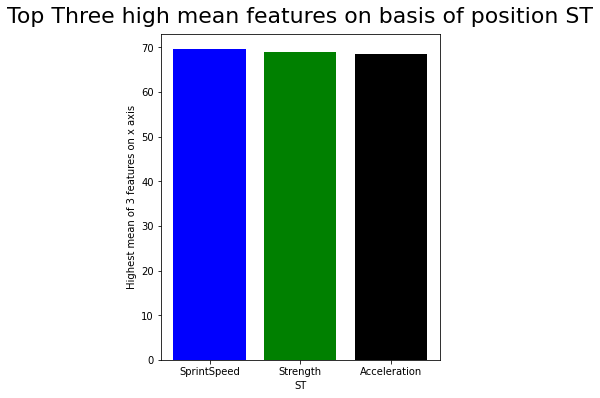

In [66]:
for pos,j in groups:
  three_high_mean_columns = dict(j.nlargest(3))
  plt.figure(figsize=(5,6))
  plt.bar(range(len(three_high_mean_columns)), list(three_high_mean_columns.values()), color=['blue','green','black'], align='center')
  plt.title("Top Three high mean features on basis of position "+pos, y=1.015, fontsize=22);
  plt.xticks(range(len(three_high_mean_columns)), list(three_high_mean_columns.keys()))
  plt.ylabel('Highest mean of 3 features on x axis')
  plt.xlabel(pos)

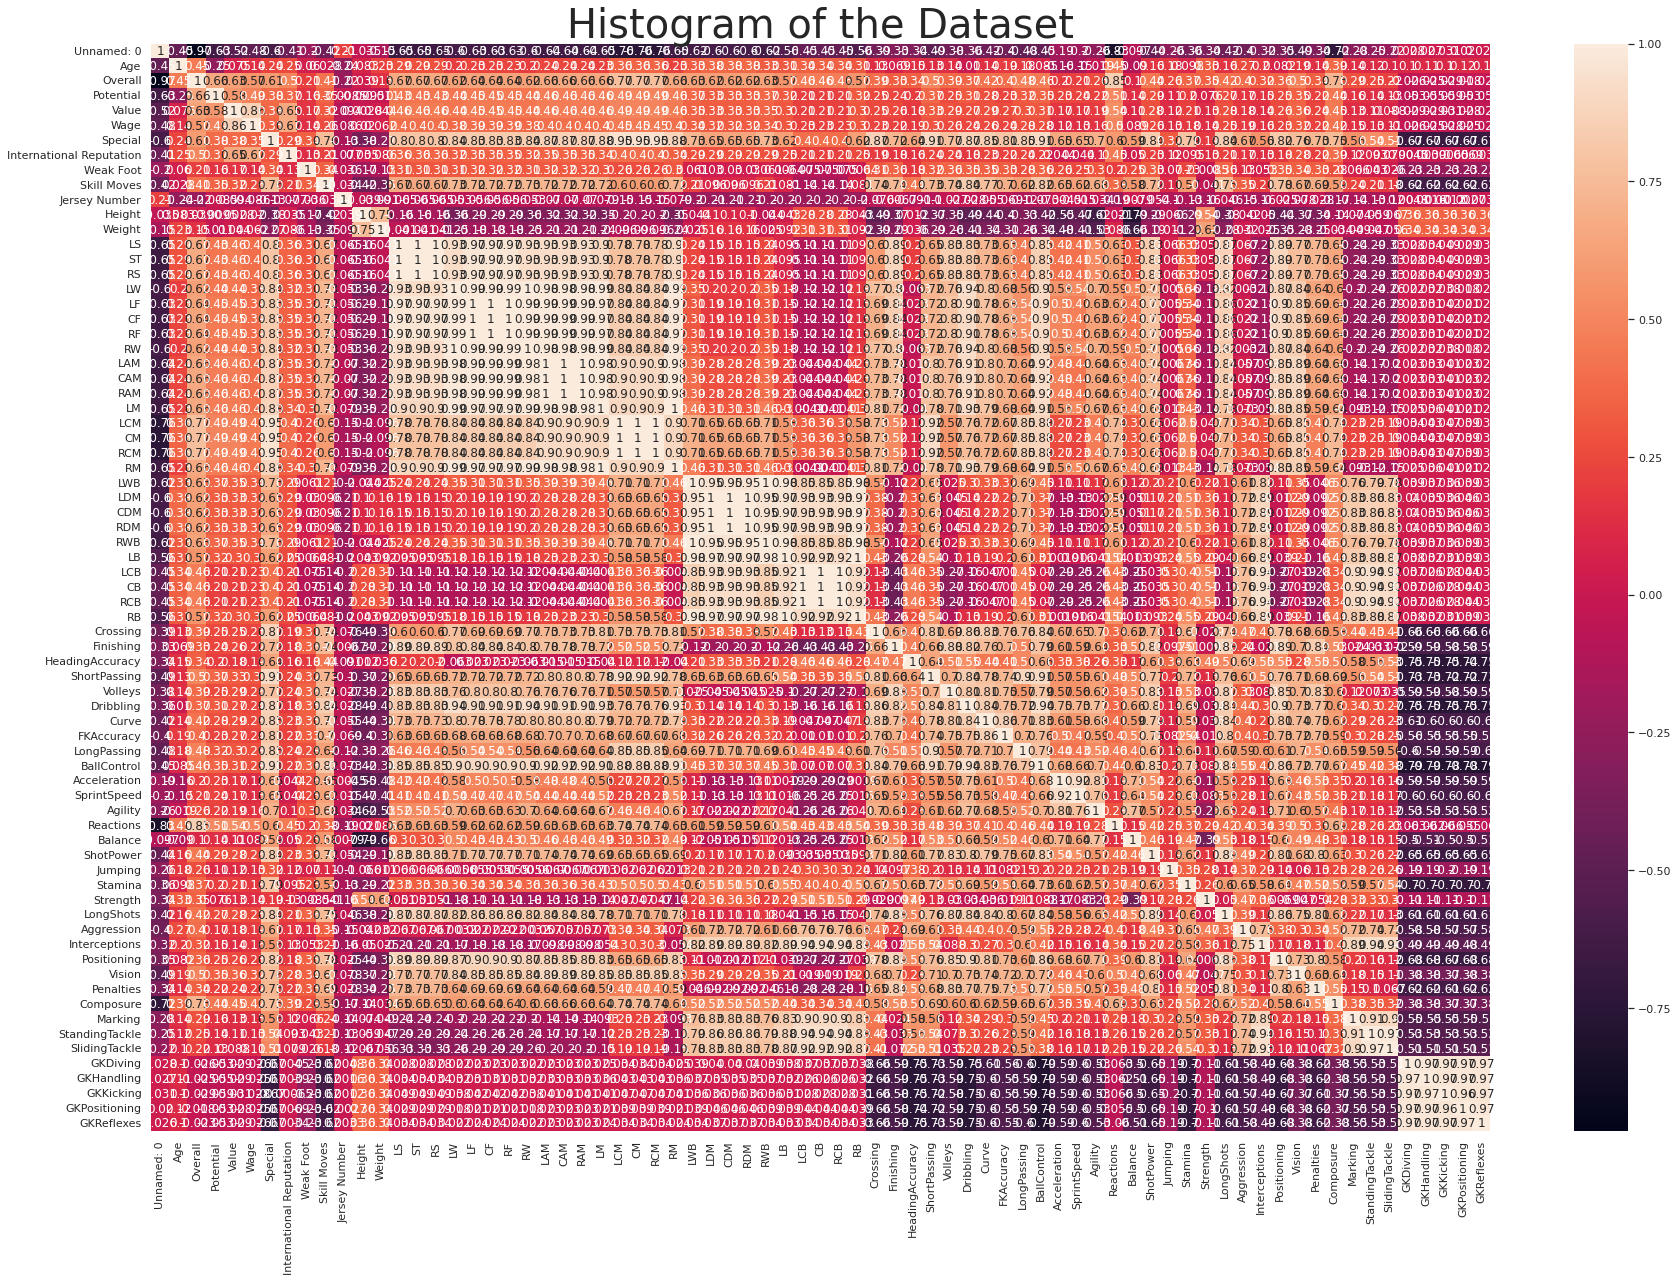

In [72]:
# Heatmap for the data frame
# plotting a correlation heatmap

plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(correlation_matrix, annot = True)
plt.title('Histogram of the Dataset', fontsize = 40)
plt.show()

Text(0.5, 1.0, 'Correlated Map - Features of players according to their Positioning')

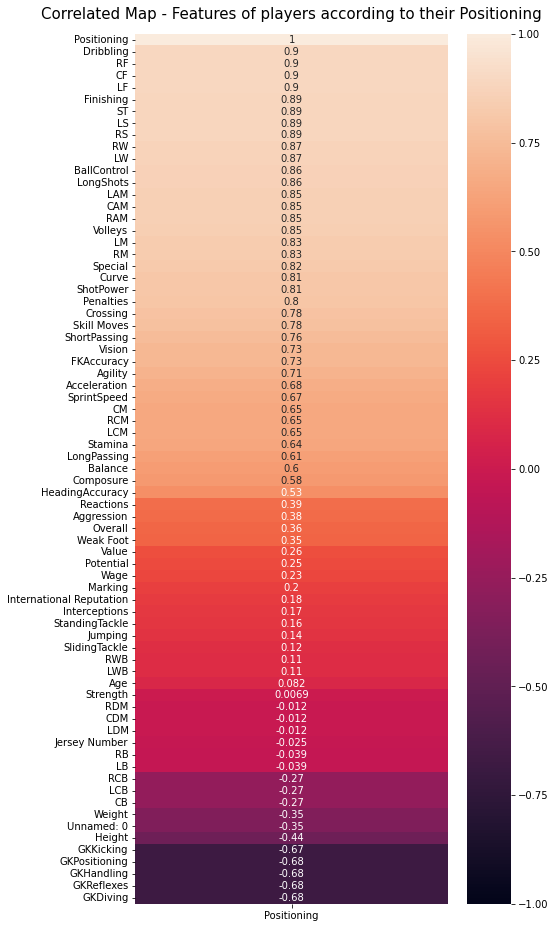

In [67]:
#all the na values are automatically excluded when doing the pairwise comparision
#we are correlating all the columns with Positioning column, so the value of Position will becomes 1

plt.figure(figsize=(7,16))
#heatmap1 = sns.heatmap(df2.corr()[['Positioning']].sort_values(by="Positioning",ascending=False),vmin=-2,vmax=2, annot=True)
heatmap1 = sns.heatmap(correlation_matrix[['Positioning']].sort_values(by="Positioning",ascending=False),vmin=-1,vmax=1, annot=True)
heatmap1.set_title('Correlated Map - Features of players according to their Positioning', fontdict={'fontsize':15},pad=15)


In [68]:
print(correlated_features)

{'LF', 'LAM', 'BallControl', 'CF', 'LB', 'LDM', 'SlidingTackle', 'StandingTackle', 'GKKicking', 'CM', 'CB', 'RF', 'CDM', 'RWB', 'SprintSpeed', 'CAM', 'RS', 'LM', 'Dribbling', 'RDM', 'ShortPassing', 'Interceptions', 'RM', 'ST', 'LCB', 'GKReflexes', 'RCM', 'RCB', 'GKPositioning', 'Marking', 'RAM', 'RB', 'GKHandling', 'Overall', 'LCM', 'LW', 'RW'}


#Question 1 - part 4

Can you use visualisation techniques to find outliers? Like Ronaldo and Messi.

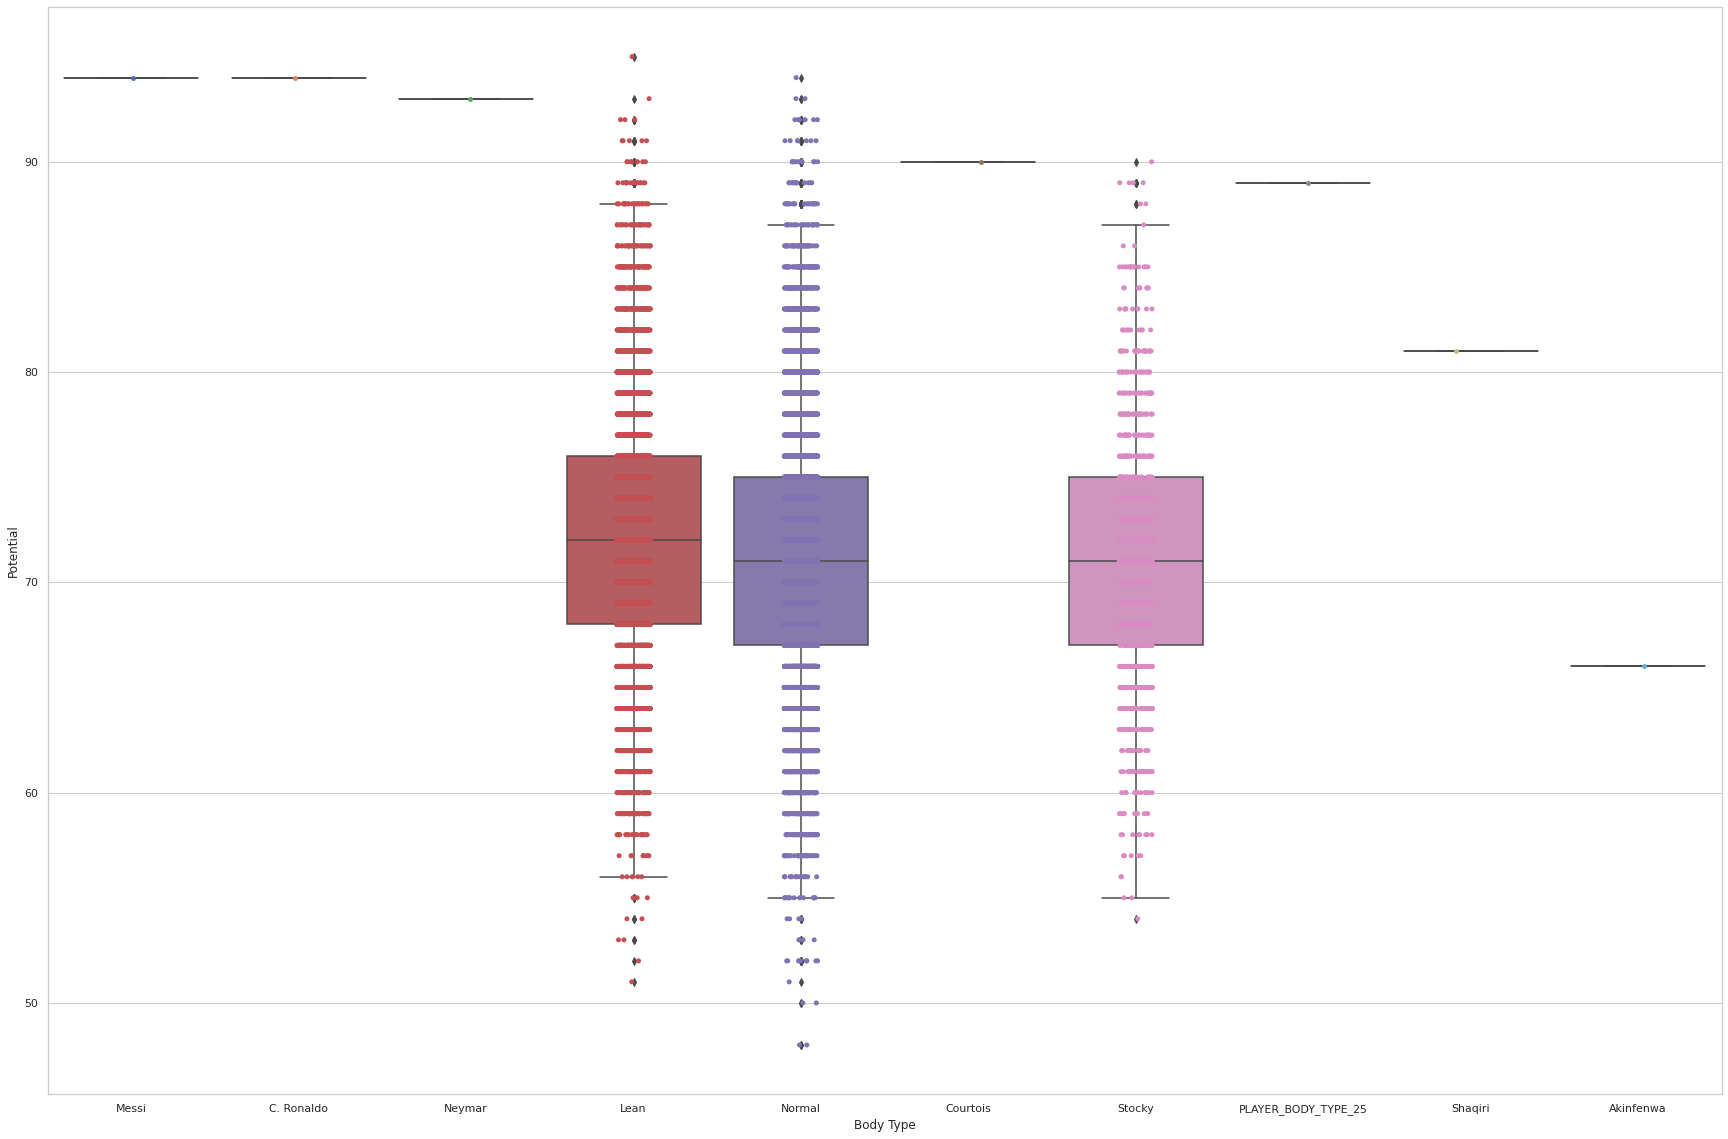

In [69]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Body Type", y="Potential", data=df1)
#ax = sns.swarmplot(x="Body Type", y="Potential", data=df1, color=".25")
ax = sns.stripplot(x="Body Type", y="Potential", data=df1)
plt.show()

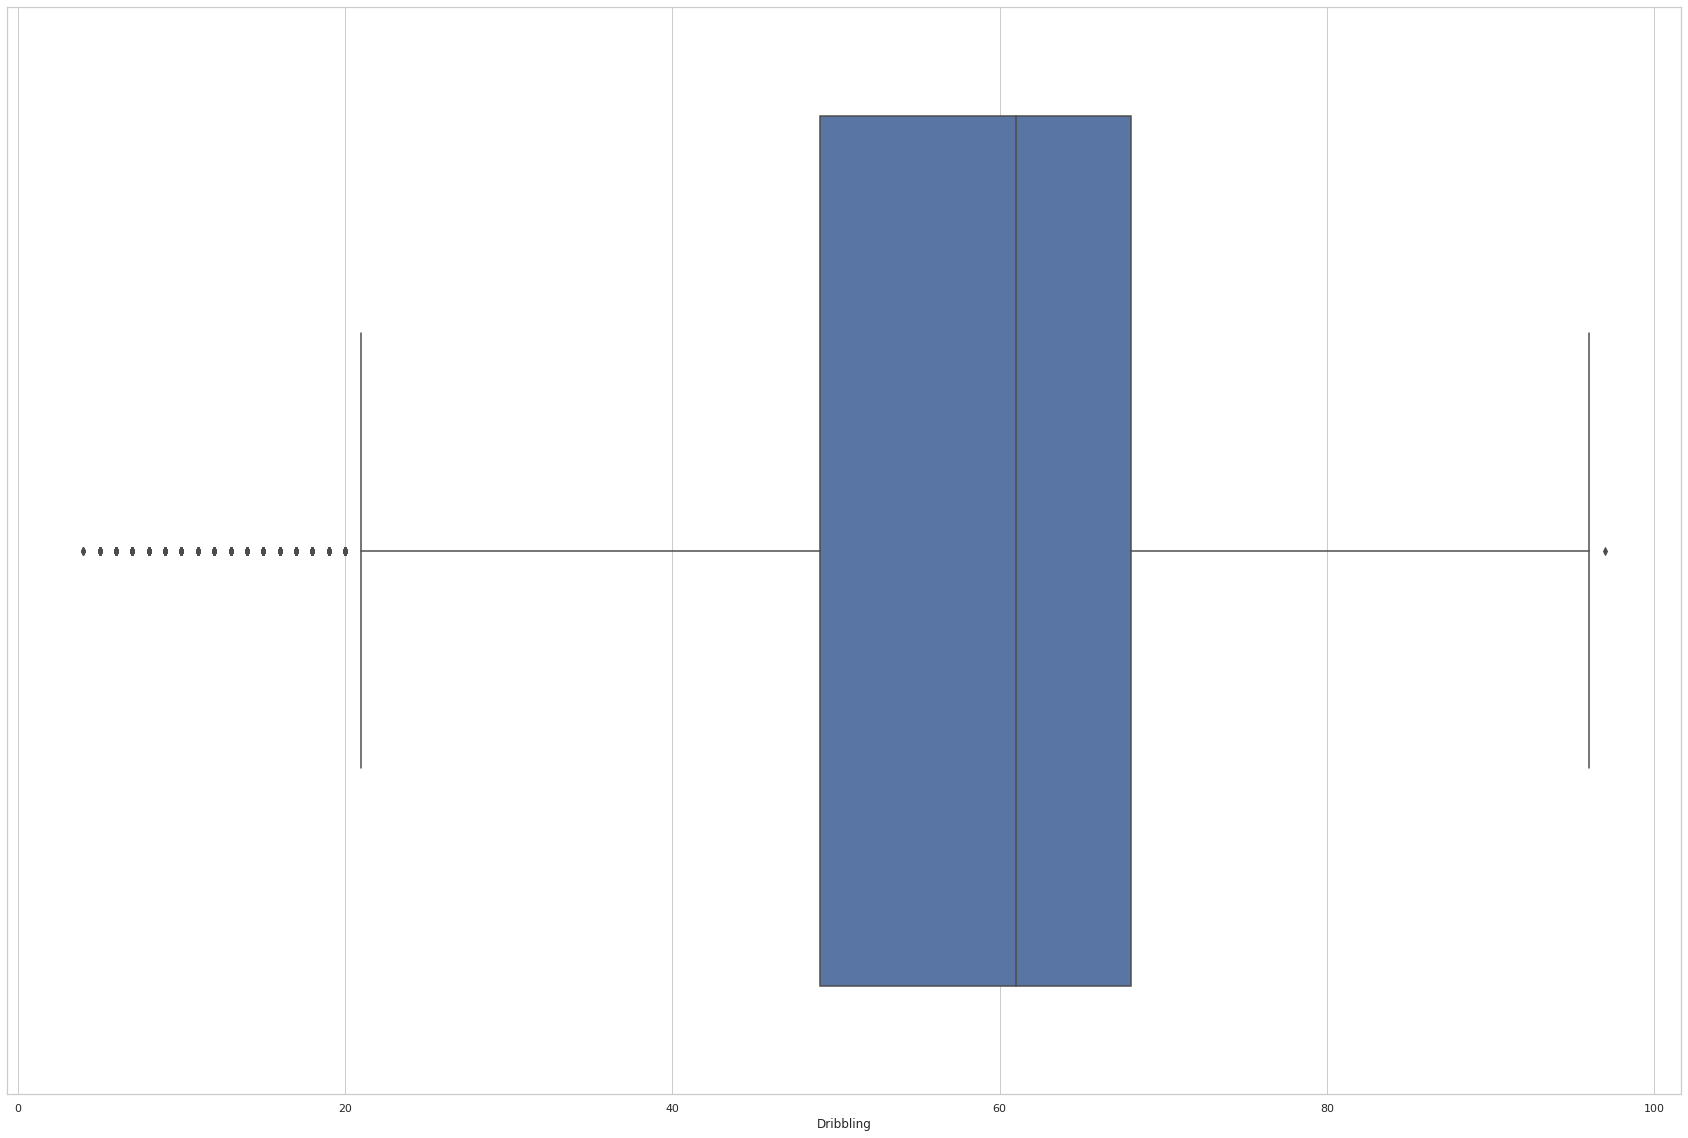

In [70]:
ax = sns.boxplot(x=df1["Dribbling"])